# HR Analytics Project

## Problem statement - Create a classification model to predict if an employee will leave the company by evaluating his professional behaviour

#### Lets begin by importing the library for data manipulation and visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
df=pd.read_csv('HR.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


There are 1470 rows and 35 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 9 features which are categorical and remaining are numerical

There are no null values in our dataset

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Observation :
1. Min age is 18 years and maximum age of the employee is 60years. 
2. Monthly income varies from 1009 to 19999.
3. Standard hours and Employee count is constant. Hence it will have no impact on machine modelling.
4. Maximun years at company is 40years.
5. There are employee who has not got promotion since last 15years.

There are few columns we need to drop going further as this will have no impact on our data.

a)Employee number -  It is uinque to every employee and thus not play a part for an employee to leave the company

b)Standard hours is constant for all employees hence this will not play a part for an employee decision to leave the company

c)Employee count is standard throughout and will not play an impotant feature for the model.

d)There is a column for Above 18 which needs to be dropped as min age of the employee in the dataset is 18. Hence all the employee is above 18years.

In [6]:
df.drop(['EmployeeNumber','StandardHours','EmployeeCount','Over18'],axis=1,inplace=True)

In [7]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


Now we have 31 columns in our dataset

Lets check how some of the feature is affecting the Attrition

### EDA

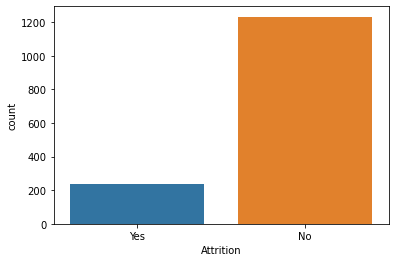

In [8]:
sns.countplot(df.Attrition)
plt.show()

Attrition is our target variable. We can see that more than 200 employees has left the company.

Also there is class imbalance which we have to check before model building

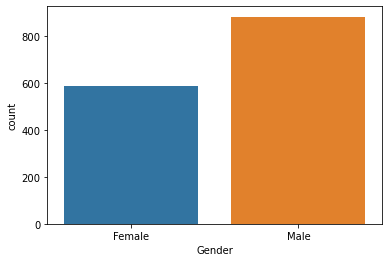

In [9]:
sns.countplot(df.Gender)
plt.show()

There are mostly Male employees in the company.

<AxesSubplot:xlabel='Age', ylabel='count'>

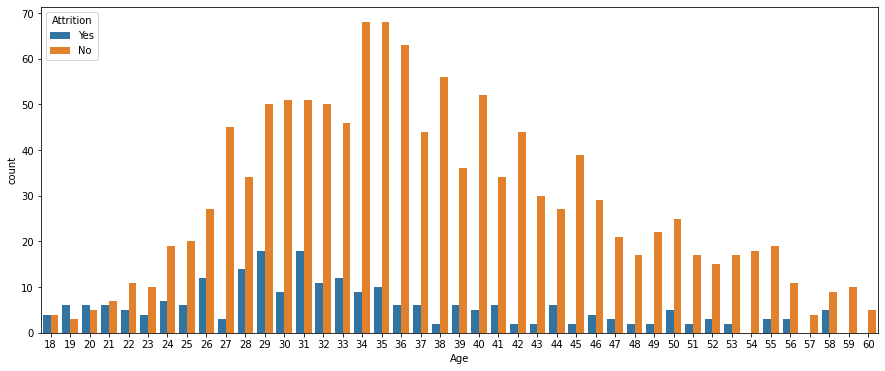

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Age',hue='Attrition')

<AxesSubplot:xlabel='Gender', ylabel='count'>

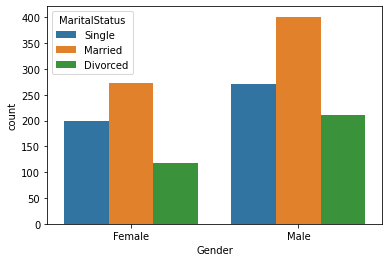

In [11]:
sns.countplot(data=df,x='Gender',hue='MaritalStatus')

There are high number of married male and female working in the company

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

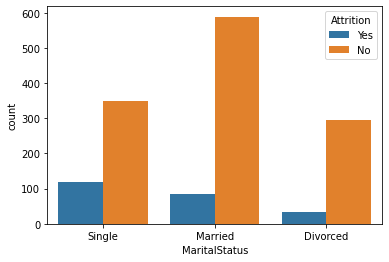

In [12]:
sns.countplot(data=df,x='MaritalStatus',hue='Attrition')

Attrition is high among the single employee as compared to married and divorced

<AxesSubplot:xlabel='OverTime', ylabel='count'>

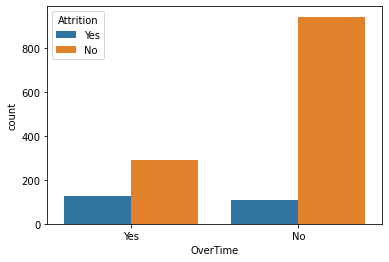

In [13]:
sns.countplot(data=df,x='OverTime',hue='Attrition')

There are 30% chance of an employee doing an overtime, that he/she will leave the company

<AxesSubplot:xlabel='Department', ylabel='count'>

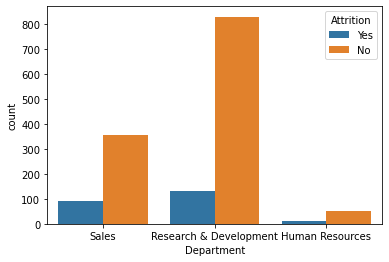

In [14]:
sns.countplot(data=df,x='Department',hue='Attrition')

Attrition is high in R&D department and least in HR

<AxesSubplot:xlabel='Department', ylabel='count'>

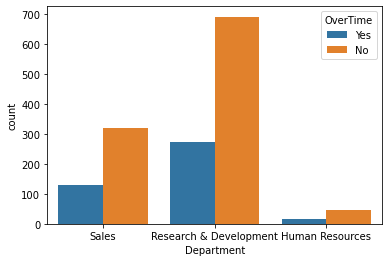

In [15]:
sns.countplot(data=df,x='Department',hue='OverTime')

As we can see that overtime is high in R&D hence the attrition is also high

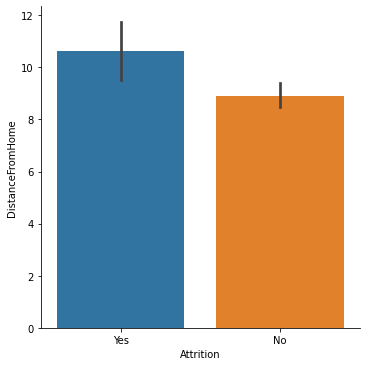

In [16]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='DistanceFromHome')

Percentage wise staff staying far is more likely to leave the company

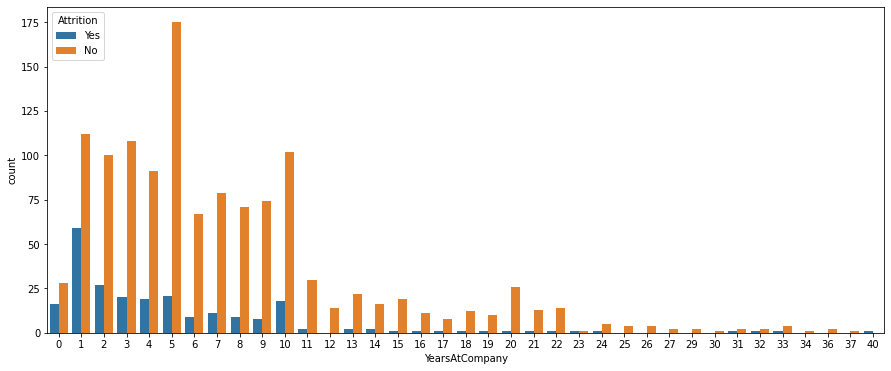

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='YearsAtCompany',hue='Attrition')
plt.show()

Attrition is low if the employee has spent more years in the company

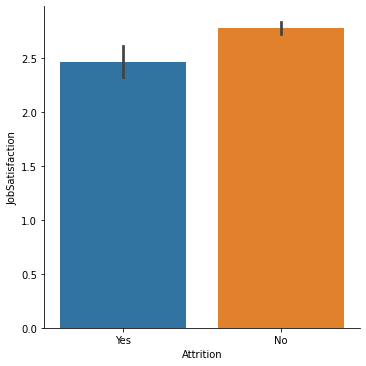

In [18]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='JobSatisfaction')

Many employees with job satisfaction and are likely to stay with the company

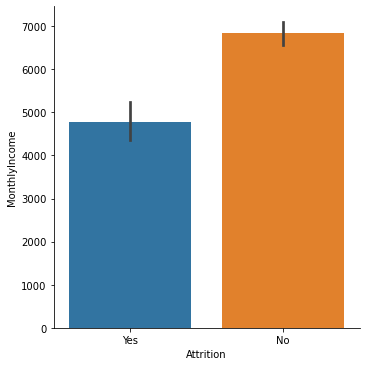

In [19]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

Employee with mothly income of above 5000 is less like to leave the company

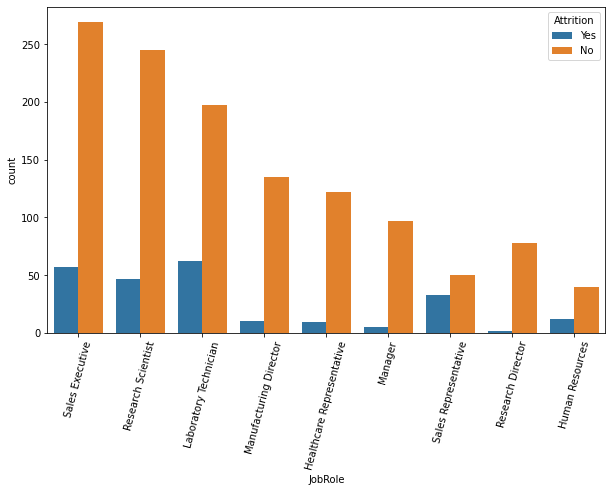

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='JobRole',hue='Attrition')
plt.xticks(rotation=75)
plt.show()

Attrition is low in Senior Management position

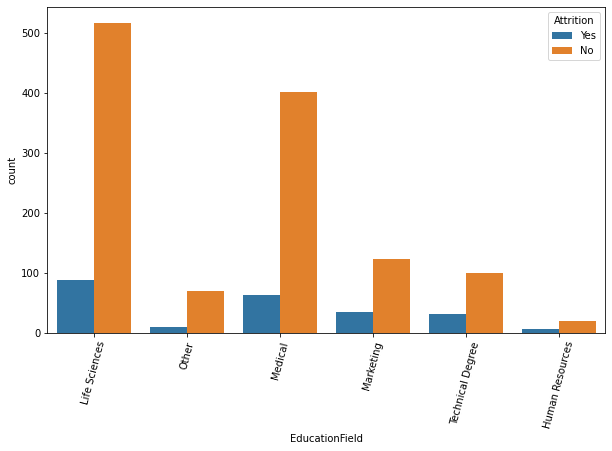

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='EducationField',hue='Attrition')
plt.xticks(rotation=75)
plt.show()

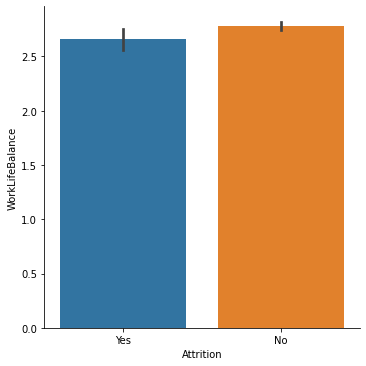

In [22]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='WorkLifeBalance')

The above data shows that Worklife balance has not a deciding facor for an employee to leave the company

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

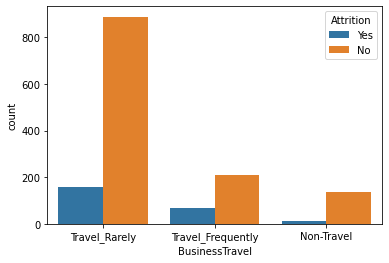

In [23]:
sns.countplot(data=df,x='BusinessTravel',hue='Attrition')

Employees who are non traveller are less like to leave. Even those who travel frequently it is less likely for them to leave

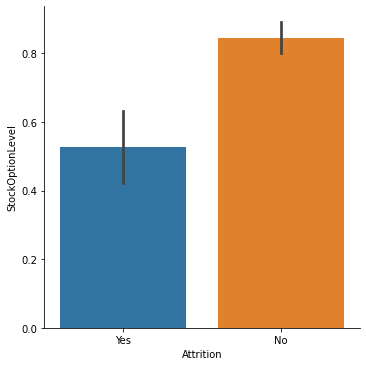

In [24]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='StockOptionLevel')

Higher the stock option level, less is the attrition.

Key takeaway from above visualization:
1. There is class imbalance in our target variable.
2. Most of the employees are Male.
3. Most of the employees are married.
4. Attrition is high among Single employees.
5. Employee is less likely to resign if they spent more years in the company.
6. High paid employee is also more likele to stay.


<AxesSubplot:>

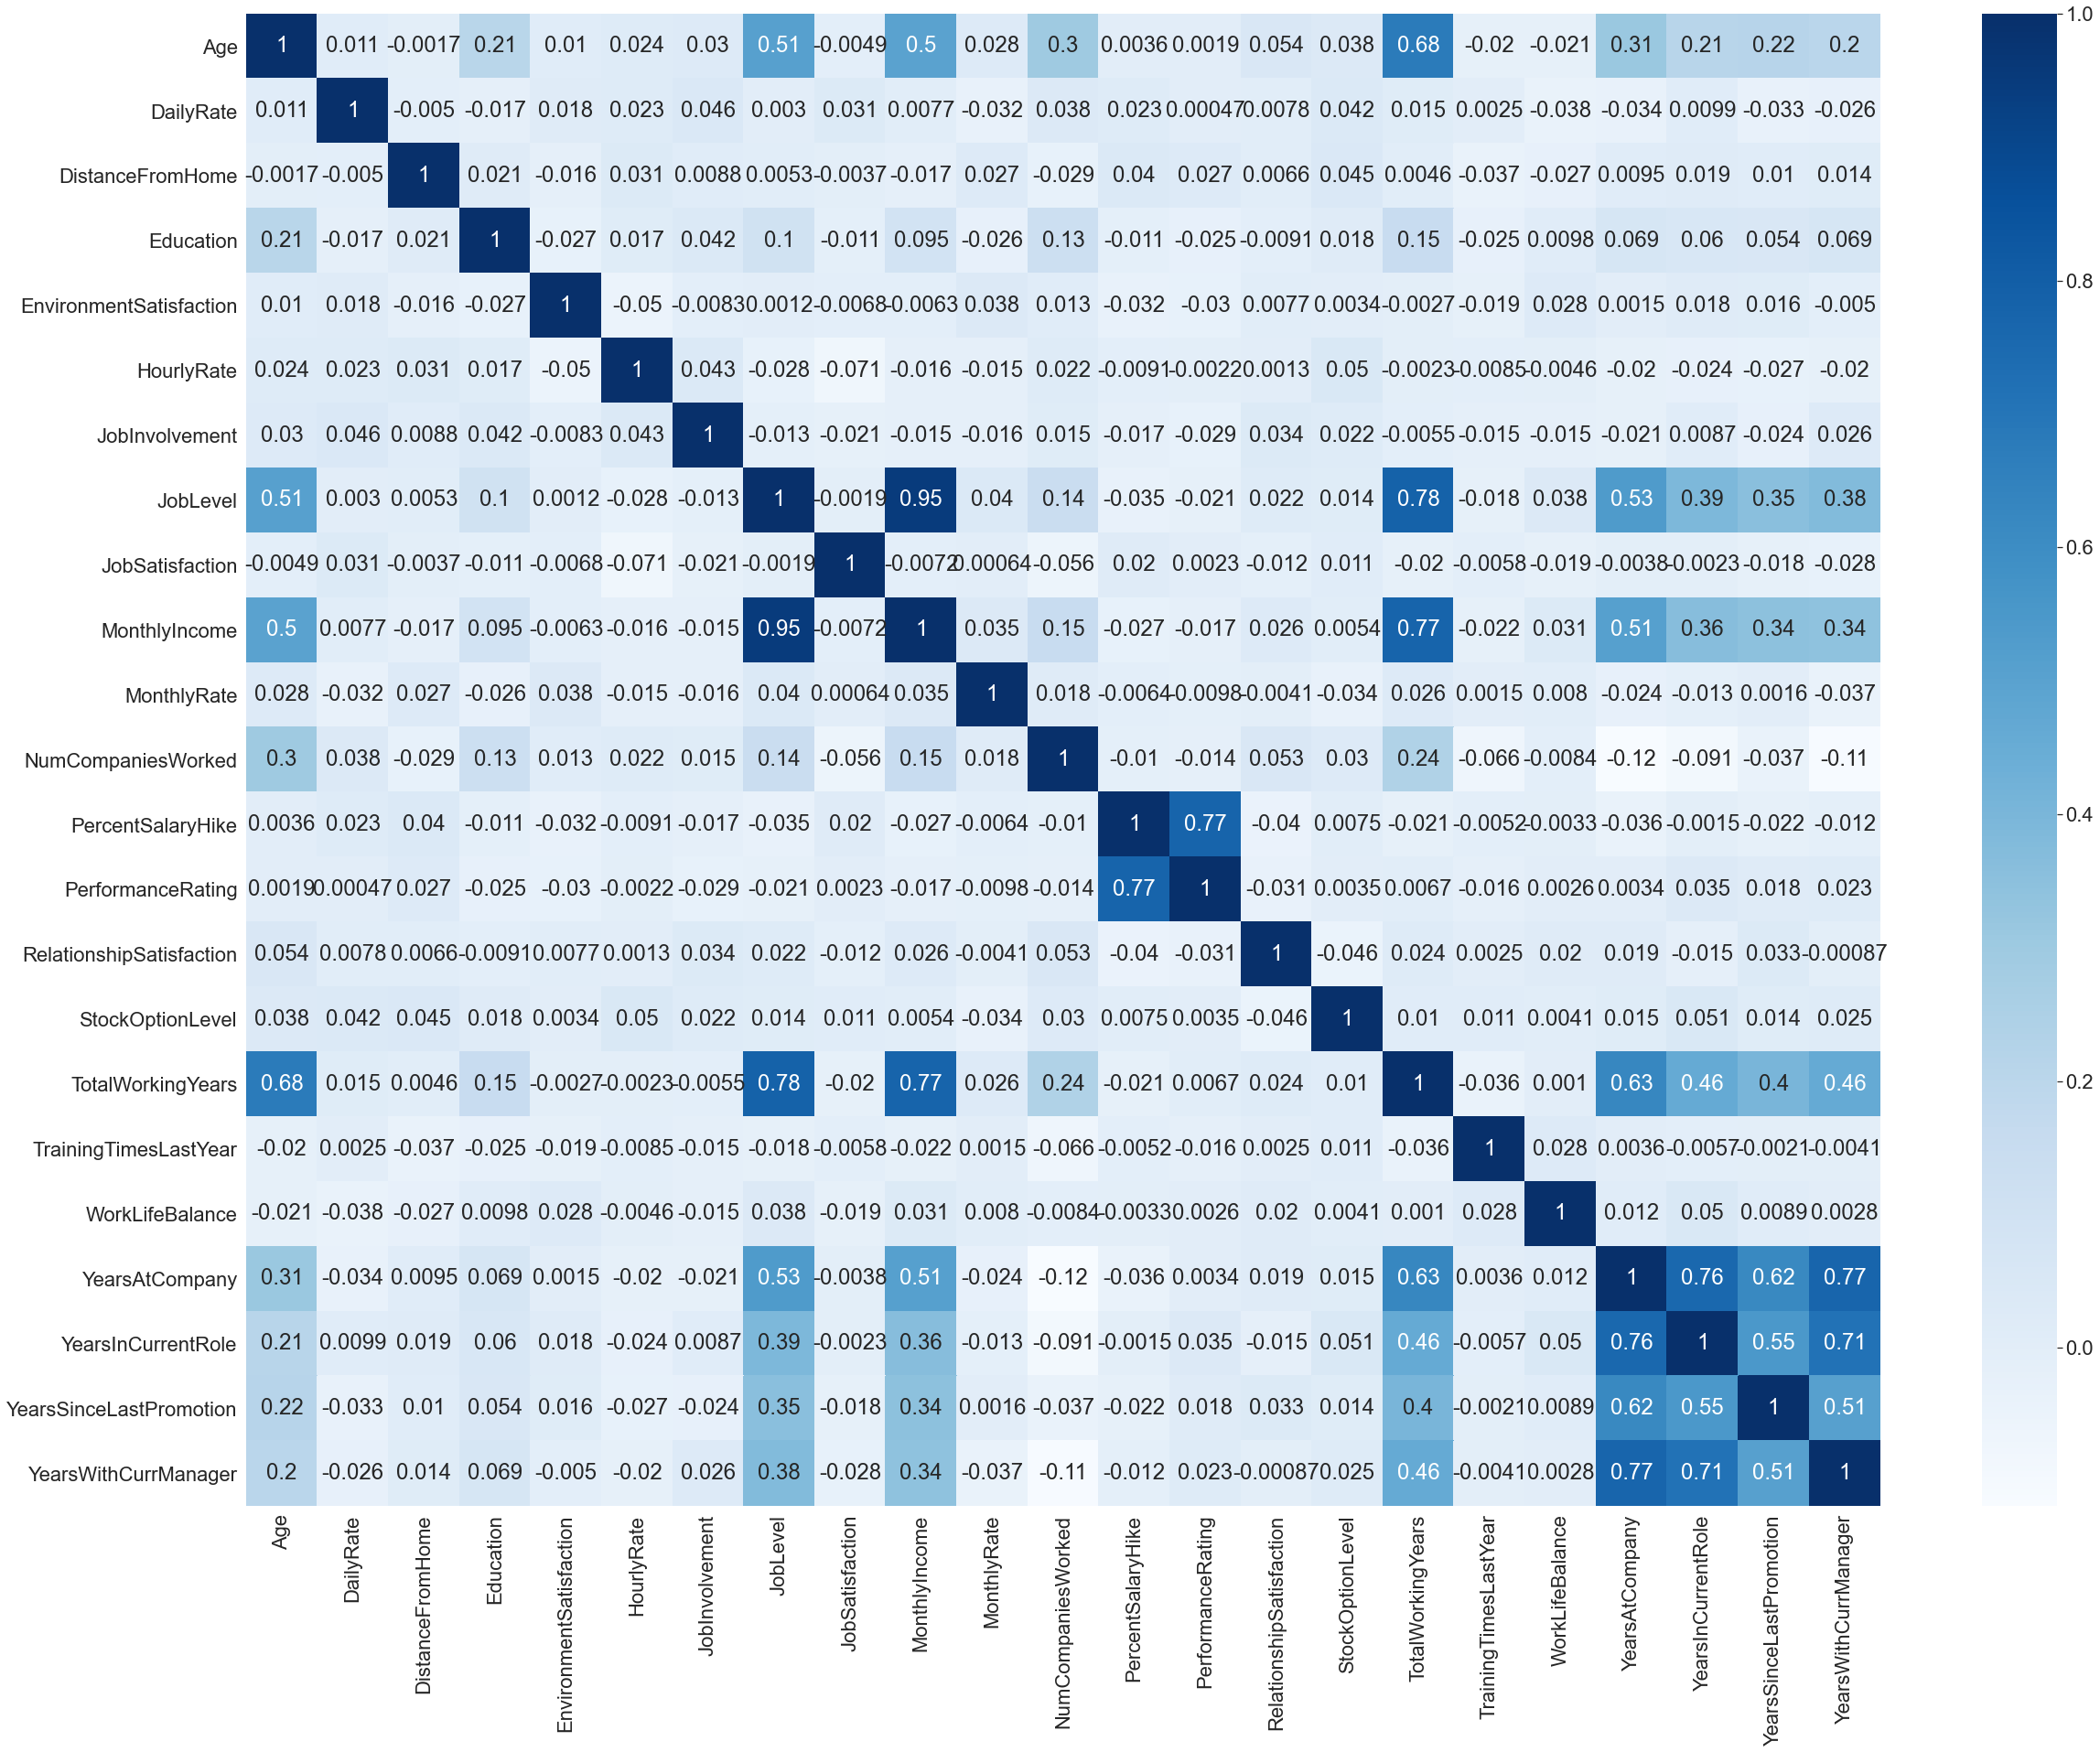

In [25]:
df.corr()
plt.figure(figsize=(40,30))
sns.set(font_scale=2.0)
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Performance rating and PercenrSalaryHike is highly corelated

Monthly income is highly corelated with Job level. Its obvious as management get higher salary.

Years in company is highly corelated with years in current role. That means employess has found comfort in their current role and do not want to leave the company

Before we do Model building we need to do the following:
1. Change the categorical data to numerical using Label Encoder
2. Check for outliers and skewness.
3. Balance the clas
4. Standardize the data.

### 1. Changing the categorical data to numerical

We will use the Label Encoder for the same.
Lets import the libraray.

In [26]:
from sklearn.preprocessing import LabelEncoder

Converting the categorical data to the numerical data.

In [27]:
le=LabelEncoder()

df_col=list(df.columns)

for i in range(len(df_col)):
    df[df_col[i]]=le.fit_transform(df[df_col[i]])

In [28]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


Its done!!

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

### 2. Check for outliers and skewness.

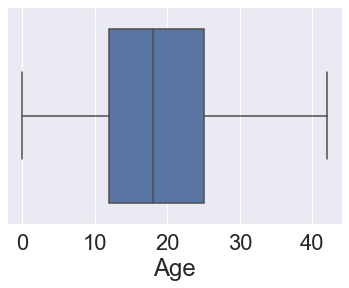

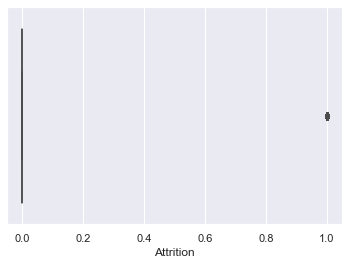

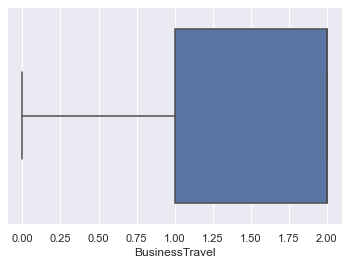

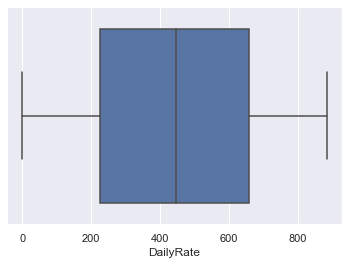

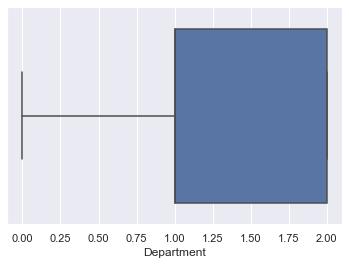

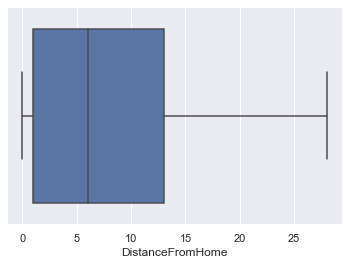

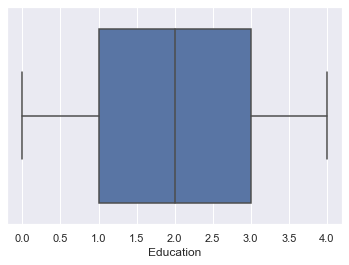

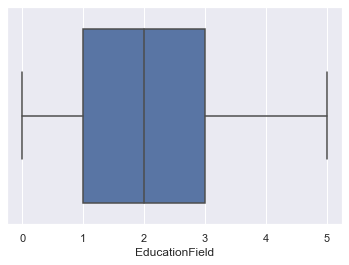

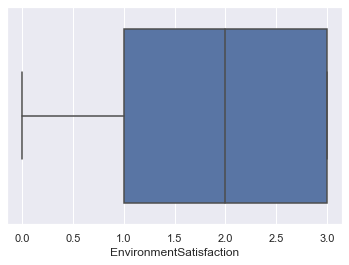

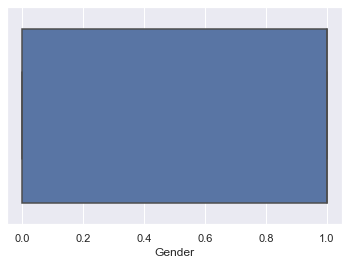

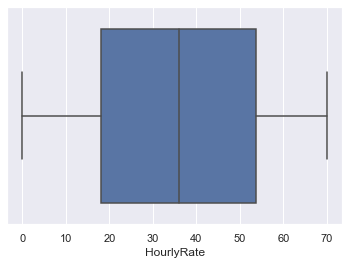

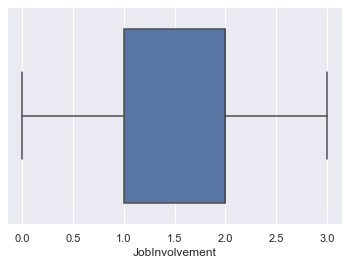

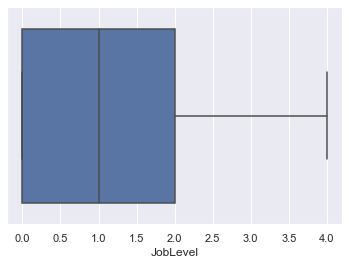

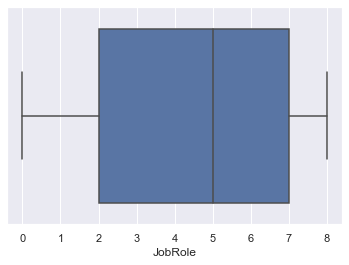

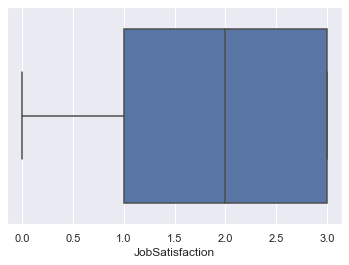

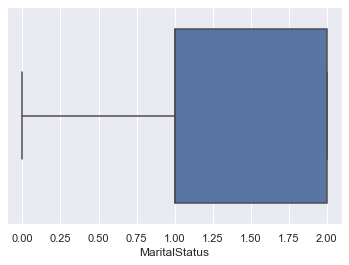

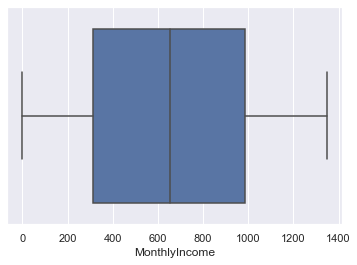

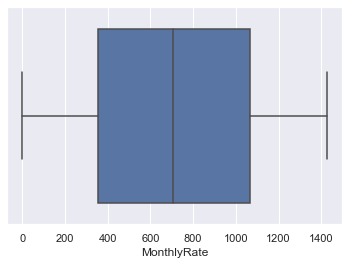

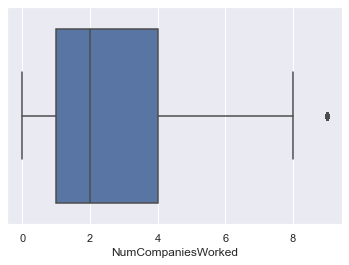

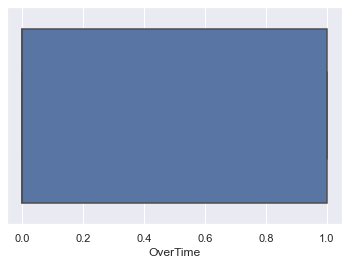

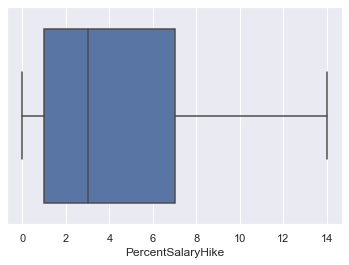

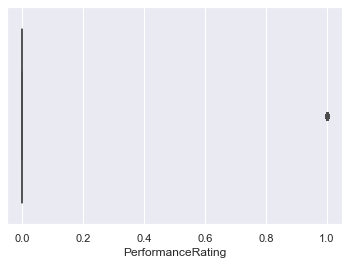

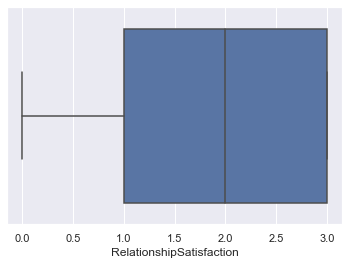

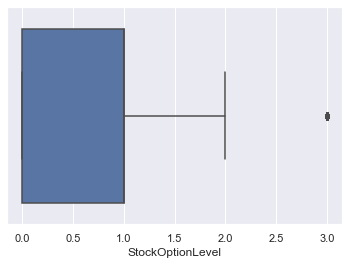

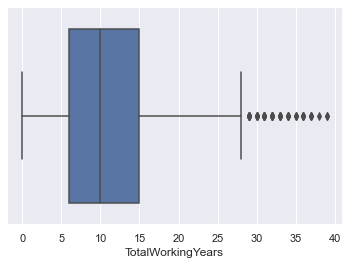

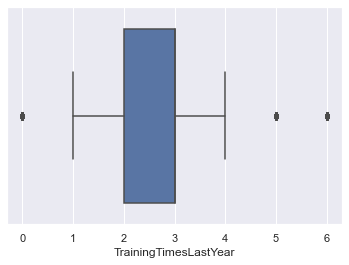

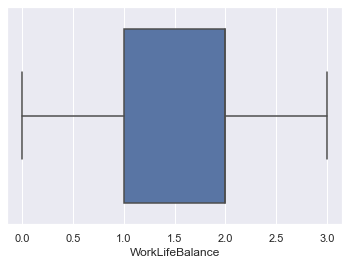

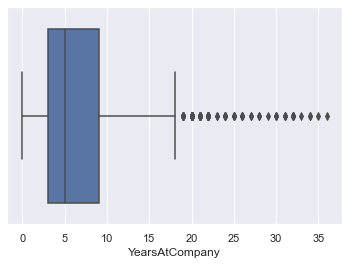

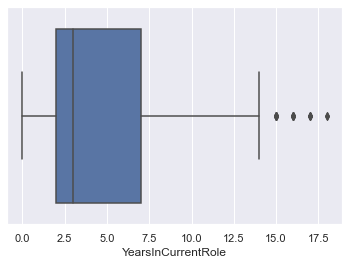

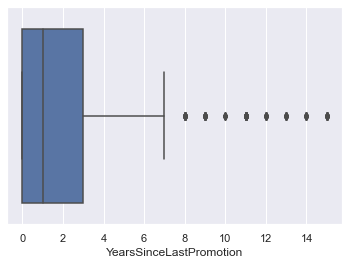

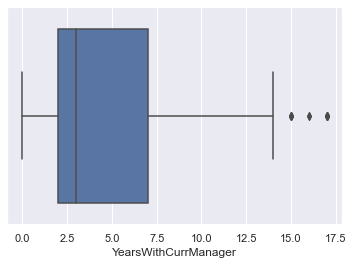

In [30]:
for i in df.columns:
    sns.boxplot(df[i])
    sns.set(font_scale=1.0)
    plt.show()

There are outliers but minor.Lets see if we remove them whether it make an impact on the dataset.

Lets import the required library zscore for the removal for outliers

In [31]:
from scipy.stats import zscore
zscr=np.abs(zscore(df))

threshold=3
print(np.where(zscr>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [32]:
print('shape before removing the outliers:', df.shape)

dfnew=df[(zscr<3).all(axis=1)]

print('shape after removing the outliers:', dfnew.shape)

shape before removing the outliers: (1470, 31)
shape after removing the outliers: (1387, 31)


In [33]:
100-((1470-1387)/1470)*100

94.35374149659864

We are losing around 6% of the data. Hence we will keep the outliers as it is as it is minor.

We will now check for skewness

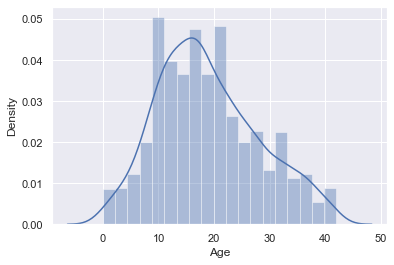

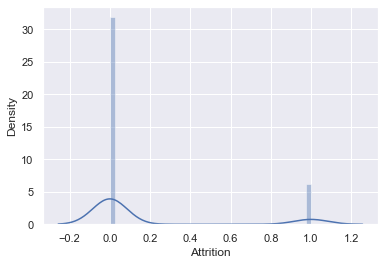

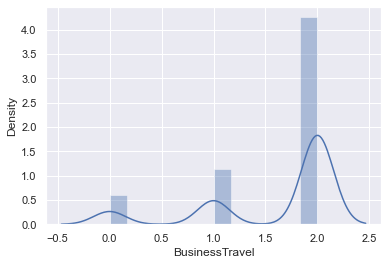

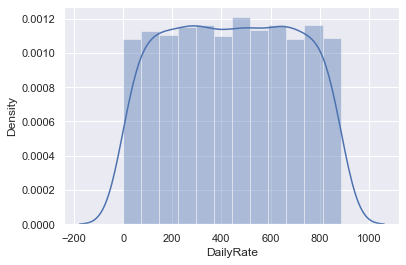

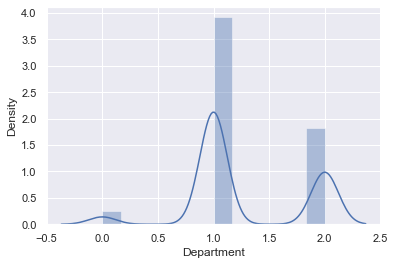

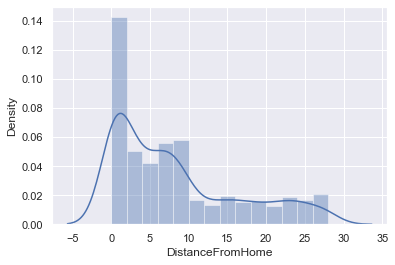

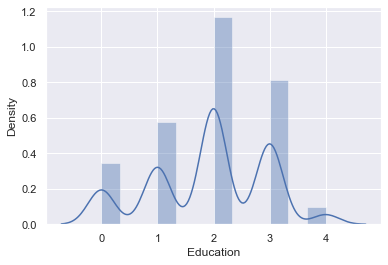

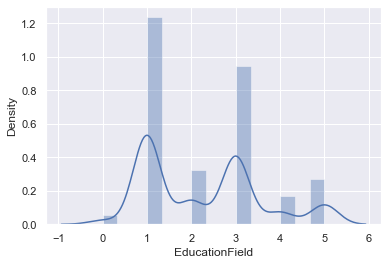

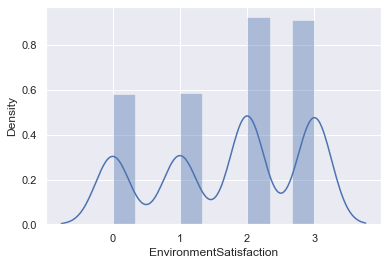

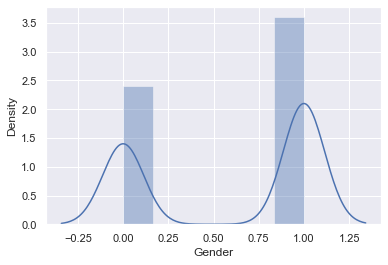

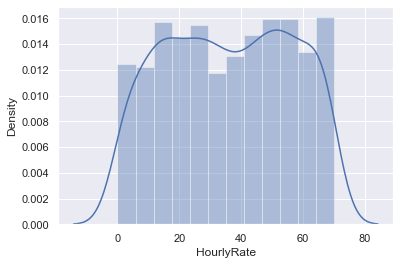

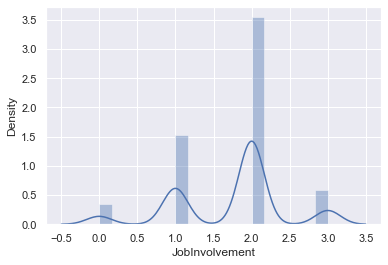

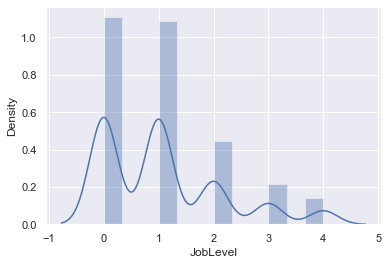

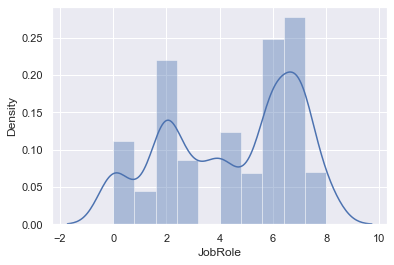

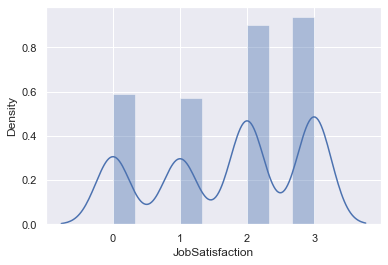

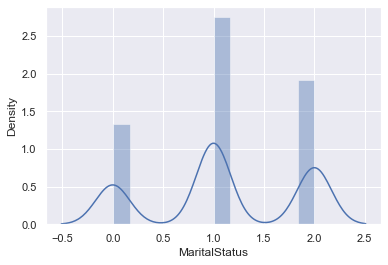

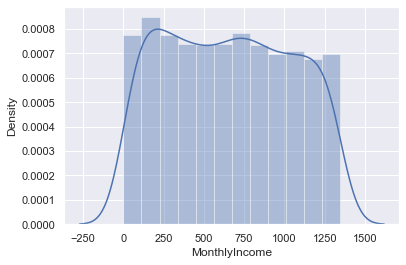

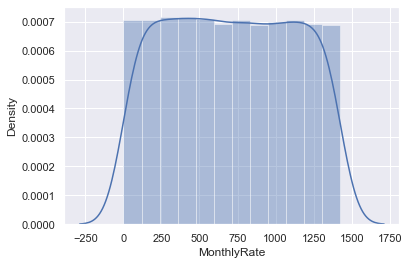

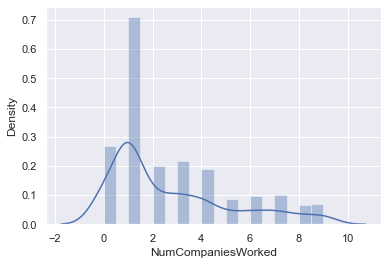

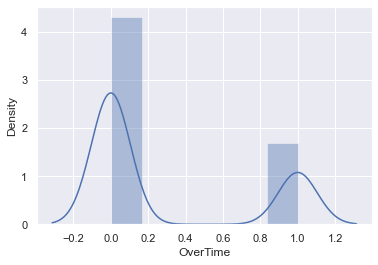

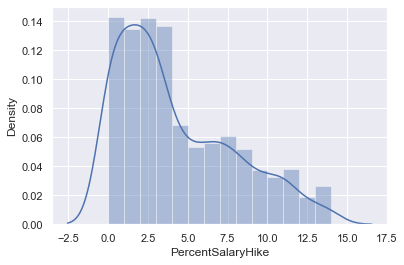

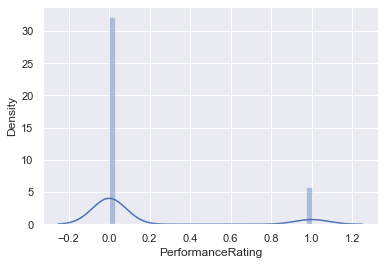

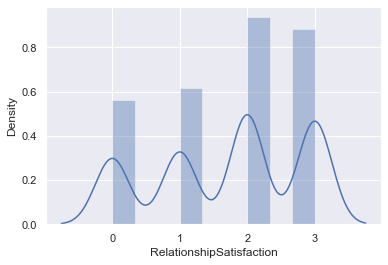

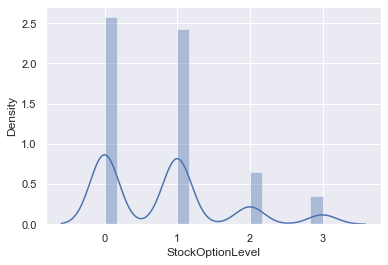

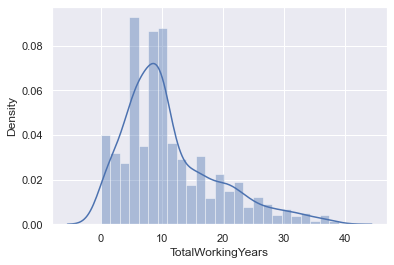

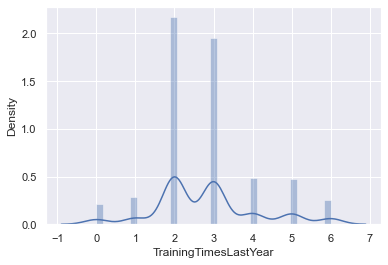

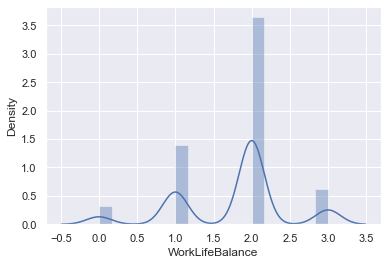

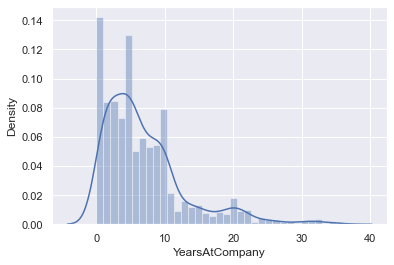

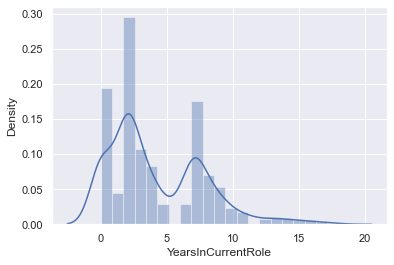

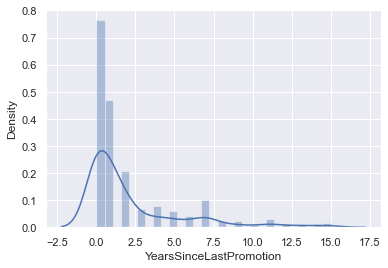

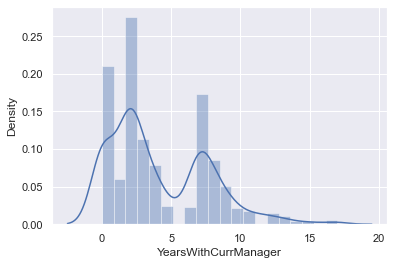

In [34]:
for i in df.columns:
    sns.distplot(df[i])
    sns.set(font_scale=1.0)
    plt.show()

Total Working years, Percenatge salary hike, Total working for years, Years at company and Years since last promotion are skewed toward right side.

First we will seperate the input and the target variable before removing the skew.

In [35]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']
y=pd.DataFrame(data=y)

In [36]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,1,0,64,...,0,0,0,8,0,0,6,4,0,5
1,31,1,113,1,7,0,1,2,1,31,...,1,3,1,10,3,2,10,7,1,7
2,19,2,805,1,1,1,4,3,1,62,...,0,1,0,7,3,2,0,0,0,0
3,15,1,820,1,2,3,1,3,0,26,...,0,2,0,8,3,2,8,7,3,0
4,9,2,312,1,1,0,3,0,1,10,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,494,1,22,1,3,2,1,11,...,0,2,1,17,3,2,5,2,0,3
1466,21,2,327,1,5,0,3,3,1,12,...,0,0,1,9,5,2,7,7,1,7
1467,9,2,39,1,3,2,1,1,1,57,...,1,1,1,6,0,2,6,2,0,3
1468,31,1,579,2,1,2,3,3,1,33,...,0,3,0,17,3,1,9,6,0,8


In [37]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


Now we will check for skewness

In [40]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.676650
Y

There is skewness in some of the feature. We will treat them using Power transform.

Importing the require library.

In [41]:
from sklearn.preprocessing import power_transform

Making a copy of a dataframe, in any case if skewenss doesnt work then we will have the data ready.

In [42]:
x_new=x.copy()

Applying the power transform

In [43]:
x2=power_transform(x)

In [44]:
x2

array([[ 0.50993885,  0.63546836,  0.73469647, ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.2681303 , -1.39286498, -1.33832411, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.09650892,  0.63546836,  1.32387414, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.10215697,  0.63546836, -1.79579143, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.2681303 , -1.39286498,  0.58109251, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.2336871 ,  0.63546836, -0.31843583, ..., -0.08961473,
         0.09685415, -0.40688122]])

Putting a new data into dataframe

In [45]:
x2=pd.DataFrame(data=x2,columns=x.columns)

In [46]:
x2.skew()

Age                        -0.031035
BusinessTravel             -0.970506
DailyRate                  -0.279407
Department                  0.013801
DistanceFromHome           -0.060046
Education                  -0.146061
EducationField             -0.008386
EnvironmentSatisfaction    -0.263120
Gender                     -0.408665
HourlyRate                 -0.264831
JobInvolvement             -0.046711
JobLevel                    0.057017
JobRole                    -0.319659
JobSatisfaction            -0.270850
MaritalStatus              -0.156911
MonthlyIncome              -0.268411
MonthlyRate                -0.285494
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike          -0.050437
PerformanceRating           1.921883
RelationshipSatisfaction   -0.250323
StockOptionLevel            0.087019
TotalWorkingYears          -0.010839
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.038587
YearsAtCompany             -0.009847
Y

Skew from column Business Travel, Overtime and Performance Rating are still there but apart from Power transform none of the skew method was effective..

Assigning x2 back to x 

In [47]:
x=x2

### 3. We will now balance the class using SMOTE

Import the SMOTE library for over sampling the data.

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
SM=SMOTE()
X,Y=SM.fit_resample(x,y)

In [50]:
y_new=pd.DataFrame(data=Y)

In [51]:
x_new=pd.DataFrame(data=X)

In [52]:
y_new.value_counts()

Attrition
1            1233
0            1233
dtype: int64

We can see that the class is now balance.

In [53]:
print(x_new.shape)
print(y_new.shape)

(2466, 30)
(2466, 1)


### 4. Standardize the data.

We will bring our data to the standard scale using Standard Scaler

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)

In [55]:
sc_x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.683274,0.694890,0.828277,1.319135,-1.704194,-0.947698,-1.027502,-0.598848,-1.333885,1.378751,...,-0.425095,-1.565125,-0.901701,-0.026169,-2.701936,-2.081295,0.324027,0.374212,-1.083557,0.655994
1,1.427003,-1.424227,-1.341845,-0.549099,0.182087,-1.892171,-1.027502,0.333021,0.814266,-0.160858,...,2.468674,1.313172,0.759984,0.264916,0.292793,0.334671,0.950440,1.067108,0.153148,1.080684
2,0.277729,0.694890,1.445052,-0.549099,-1.136745,-0.947698,1.264705,1.304527,0.814266,1.292232,...,-0.425095,-0.652348,-0.901701,-0.189152,0.292793,0.334671,-2.042157,-1.466490,-1.083557,-1.409616
3,-0.158669,-1.424227,1.494306,-0.549099,-0.777726,1.194934,-1.027502,1.304527,-1.333885,-0.423433,...,-0.425095,0.312638,-0.901701,-0.026169,0.292793,0.334671,0.668458,1.067108,0.992417,-1.409616
4,-0.898073,0.694890,-0.376211,-0.549099,-1.136745,-1.892171,0.693519,-1.472921,0.814266,-1.370224,...,-0.425095,1.313172,0.759984,-0.367194,0.292793,0.334671,-0.769110,-0.292005,0.683033,-0.252161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,0.596112,0.694890,0.440379,0.522639,0.547727,-1.350361,0.693519,-0.064268,0.814266,-0.185275,...,-0.425095,1.313172,-0.901701,0.436745,-0.070709,1.055481,0.683613,1.086771,1.354528,1.080684
2462,-1.792804,0.694890,0.515768,-0.549099,0.688596,0.479906,0.873356,1.137215,-1.333885,1.340727,...,-0.425095,-1.407927,-0.901701,-1.500136,-0.559825,0.625845,-1.173024,-1.264221,-0.870572,-1.290169
2463,-0.160585,0.694890,0.783618,-0.074627,0.306683,0.371063,0.256435,-1.014269,-0.788323,-0.757128,...,2.468674,-1.333309,-0.901701,0.264916,-0.146070,1.595993,0.117450,0.297636,-1.083557,0.326819
2464,0.117217,0.186759,0.565896,-0.549099,0.688190,-0.698731,0.280845,-1.472921,-0.818792,-0.100318,...,-0.425095,-1.565125,-0.901701,0.776282,-0.559825,-1.501984,-1.257058,-1.466490,-1.083557,-1.409616


Our data is now on common scale. I am reassigning x to the sc_x.

In [56]:
y=y_new
x=sc_x
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.683274,0.694890,0.828277,1.319135,-1.704194,-0.947698,-1.027502,-0.598848,-1.333885,1.378751,...,-0.425095,-1.565125,-0.901701,-0.026169,-2.701936,-2.081295,0.324027,0.374212,-1.083557,0.655994
1,1.427003,-1.424227,-1.341845,-0.549099,0.182087,-1.892171,-1.027502,0.333021,0.814266,-0.160858,...,2.468674,1.313172,0.759984,0.264916,0.292793,0.334671,0.950440,1.067108,0.153148,1.080684
2,0.277729,0.694890,1.445052,-0.549099,-1.136745,-0.947698,1.264705,1.304527,0.814266,1.292232,...,-0.425095,-0.652348,-0.901701,-0.189152,0.292793,0.334671,-2.042157,-1.466490,-1.083557,-1.409616
3,-0.158669,-1.424227,1.494306,-0.549099,-0.777726,1.194934,-1.027502,1.304527,-1.333885,-0.423433,...,-0.425095,0.312638,-0.901701,-0.026169,0.292793,0.334671,0.668458,1.067108,0.992417,-1.409616
4,-0.898073,0.694890,-0.376211,-0.549099,-1.136745,-1.892171,0.693519,-1.472921,0.814266,-1.370224,...,-0.425095,1.313172,0.759984,-0.367194,0.292793,0.334671,-0.769110,-0.292005,0.683033,-0.252161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,0.596112,0.694890,0.440379,0.522639,0.547727,-1.350361,0.693519,-0.064268,0.814266,-0.185275,...,-0.425095,1.313172,-0.901701,0.436745,-0.070709,1.055481,0.683613,1.086771,1.354528,1.080684
2462,-1.792804,0.694890,0.515768,-0.549099,0.688596,0.479906,0.873356,1.137215,-1.333885,1.340727,...,-0.425095,-1.407927,-0.901701,-1.500136,-0.559825,0.625845,-1.173024,-1.264221,-0.870572,-1.290169
2463,-0.160585,0.694890,0.783618,-0.074627,0.306683,0.371063,0.256435,-1.014269,-0.788323,-0.757128,...,2.468674,-1.333309,-0.901701,0.264916,-0.146070,1.595993,0.117450,0.297636,-1.083557,0.326819
2464,0.117217,0.186759,0.565896,-0.549099,0.688190,-0.698731,0.280845,-1.472921,-0.818792,-0.100318,...,-0.425095,-1.565125,-0.901701,0.776282,-0.559825,-1.501984,-1.257058,-1.466490,-1.083557,-1.409616


In [57]:
y=y_new

### Model Fitting and Selection

Importing all the libraries for model fitting, cross validation and ROC AUC curve

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [59]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8441295546558705  on Random state 178


#### We can see that the best random state is 118. We will split the data with this random state

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=118)

In [61]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8299595141700404
[[220  39]
 [ 45 190]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       259
           1       0.83      0.81      0.82       235

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.9230769230769231
[[235  24]
 [ 14 221]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       259
           1       0.90      0.94      0.92       235

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

-------------------------------------------------------------------------------------------

#### Support Vector, Random Froest and AdaBoost has given us the best accuracy so far.

### Cross Validation

We will check the Underfitting or Overfitting of the model using Cross Validation

In [62]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.7988700101009272
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.9172865460577642
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.8163068382455594
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.9343694311453467
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.8487850144944199
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7266968325791854
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.8727874452866446
-------------------------------------------------------------------------------


#### Again RandomForest Classifier has given us the best score with the least difference between test score, followed by SVC.


We will check the ROC_AUC score to pick the final model

### ROC_AUC score

AUC Score of LogisticRegression()
0.828965743859361




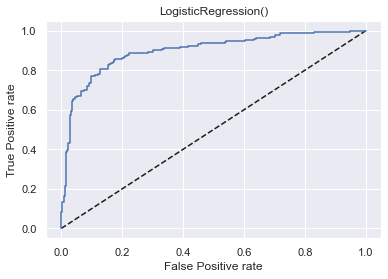



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.9238807196254005




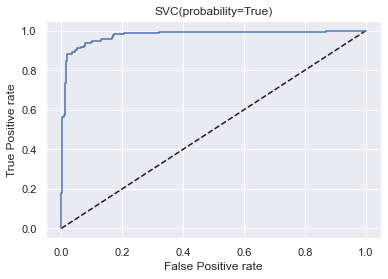



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.8119526821654481




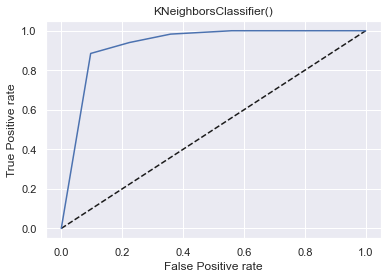



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.948188614146061




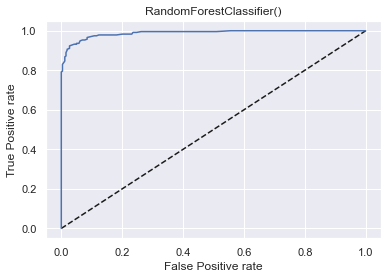



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.8342068512281278




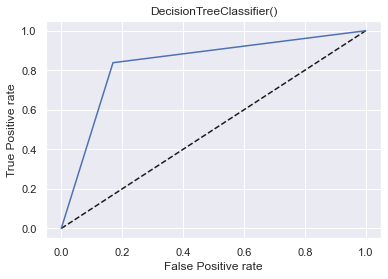



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.7667542922862072




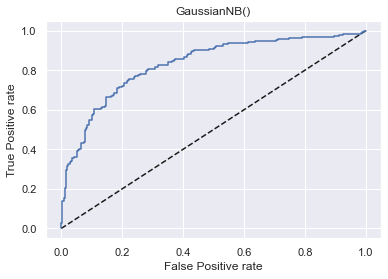



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.9265587776226074




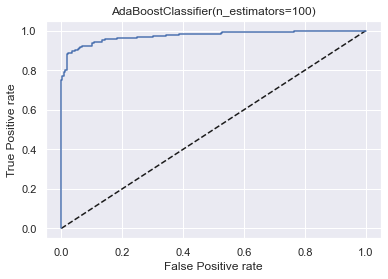



------------------------------------------------------------------------


In [63]:
auc=[]
for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    auc.append(auc_score)
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

#### ROC AUC curve shows that Random Forest and SVC has peformed the best.
##### Lets see all our model performance.

In [64]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.829960,0.798870,0.828966
1,SVC,0.923077,0.917287,0.923881
2,KNeighborsClassifier,0.803644,0.816307,0.811953
3,RandomForestClassifier,0.949393,0.934369,0.948189
4,DecisionTreeClassifier,0.834008,0.848785,0.834207
5,GaussianNB,0.767206,0.726697,0.766754
6,AdaBoostClassifier,0.927126,0.872787,0.926559


We can see that RFC and SVC has performed well over above all other models as No overfitting and underfitting was noticed.
#### RFC accuracy score has performed well with Test score, Cross Val score and ROC AUC score of 93%
#### SVC is second best with 93% accuracy on Test and ROC AUC and 92% with Cross validation

### HyperTuning of the model

We will import GridSearch to hypertune the model

In [65]:
from sklearn.model_selection import GridSearchCV

We will hypertune RFC model.

Searching the best parameters for RFC to fit the model and improve the accuracy

#### Hypertuning of RFC

In [66]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50]}

In [67]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

Random Forest classifier Performance after HyperTuning
-----------------------------------------------
Accuracy Score 94.53441295546558
Cross Validation Score 93.84204777820663
AUC ROC Score 94.39332949971248


AUC ROC Curve with Final Mod


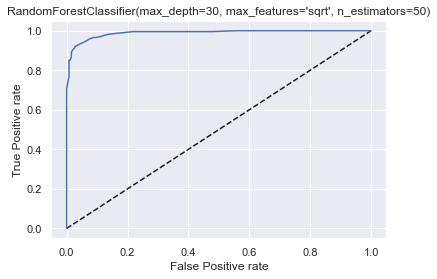

In [74]:
Finalmod=RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=2,n_estimators=50,max_depth=30)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)

cvs=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,Finalmod.predict(x_test))

print('Random Forest classifier Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc*100)
print('Cross Validation Score',cvs.mean()*100)
print('AUC ROC Score',auc_score*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

There has been an inrease in the model performance after Hypertuning.
#### We have all Test Accuracy Cross validation and AUC ROC at 94%

Lets create the obj file to save the model

In [69]:
import joblib
joblib.dump(Finalmod,'HR_model.obj')

['HR_model.obj']

#### Completed